In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import torch
import physo
import physo.learn.monitoring as monitoring
from data import load_data

Enforcing spawn multiprocessing start method.
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.

Multiprocessing start method : spawn
Running from notebook : True
Is CUDA available : False
Total nb. of CPUs available :  96
Recommended config {'parallel_mode': False, 'n_cpus': 96}
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start metho

/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/batch_execute.py:80: UserWarning: Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
  warnings.warn(msg)
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/reward.py:252: UserWarning: Parallel mode is not available on this system, switching to non parallel mode.
  warnings.warn("Parallel mode is not available on this system, switching to non parallel mode.")


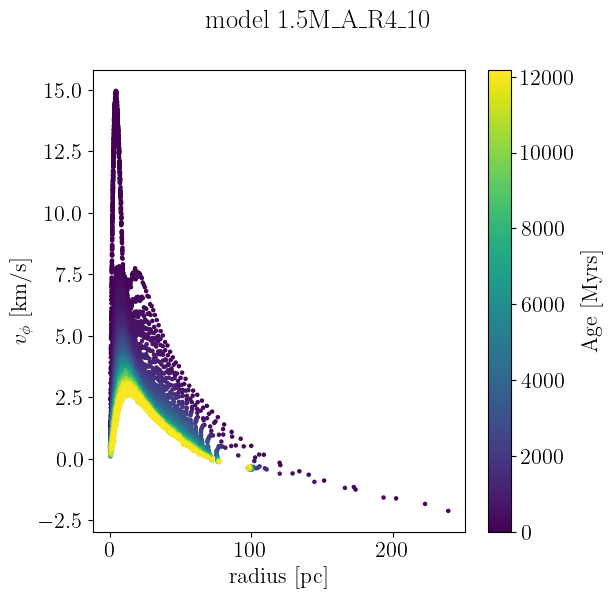

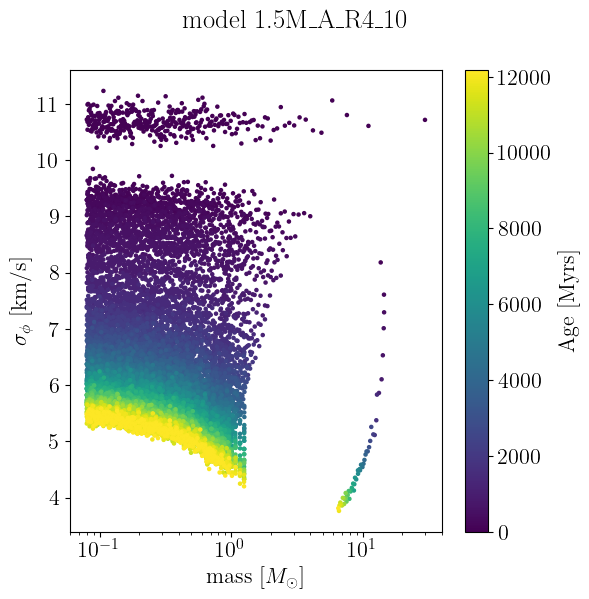

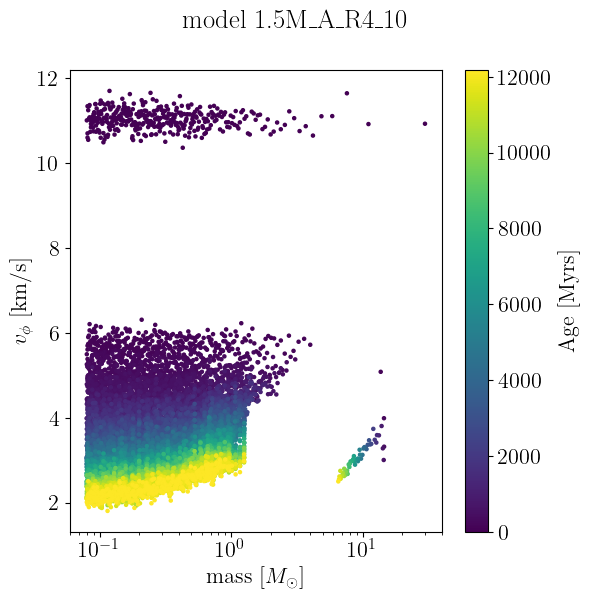

6.498


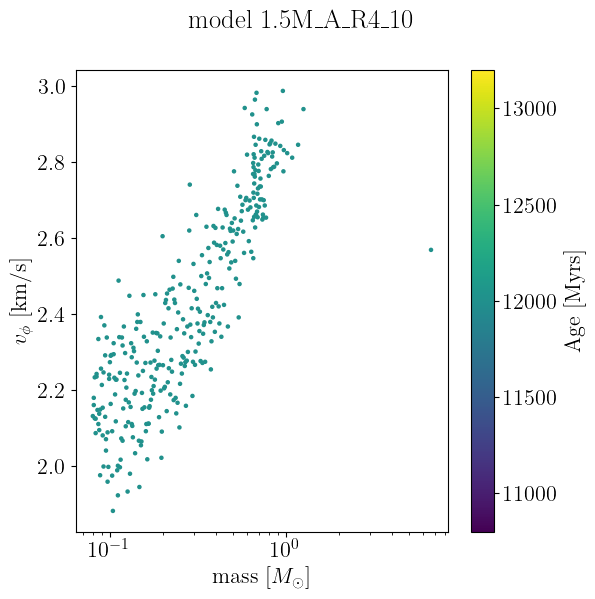

In [84]:
models=['1.5M_A_R4_10',
'500k_A_R2_10',
'500k_A_R4_10',
'500k_C_R4_10',
'250k_A_R2_25',
'250k_A_R2_25_vlk',
'250k_A_R2_10',
'250k_A_R2_5',
'250k_A_R4_25',
'250k_A_R4_25_imf50',
'250k_A_R4_25_lk',
'250k_A_R4_25_retr',
'250k_A_R4_25_vlk',
'250k_A_R4_10',
'250k_A_R4_10_retr',
'250k_B_R4_25',
'250k_B_R4_25_lk',
'250k_C_R2_10',
'250k_C_R4_25',
'250k_C_R4_25_lk',
'250k_C_R4_10',
'250k_W6_R4_25',
'250k_W6_R4_25_retr',
'500k_A_R4_LC_part1',
'500k_A_R4_LC_part2']

base_path = f"/pbs/throng/training/astroinfo2025/data/Nbody/"

def load_model_data_radial(model_name,base_path):

    # Read mass
    rad = pd.read_csv(base_path + model_name + "/radial/0.0-200.0_radial_bin.dat", delimiter=" ", header=None)
    r = rad.to_numpy()  # shape: (N_rows, varying columns)
    
    # Read sigma_phi
    disp_phi = pd.read_csv(base_path + model_name +"/radial/0.0-200.0_disp_phi.dat", delimiter=" ", header=None)
    s_phi = disp_phi.to_numpy()

     # Read sigma_phi
    vel_phi = pd.read_csv(base_path + model_name +"/radial/0.0-200.0_vphi.dat", delimiter=" ", header=None)
    v_phi = vel_phi.to_numpy()
    
    # Read age
    age = pd.read_csv(base_path + model_name + "/age.dat",
                      sep=r"\s+", header=None).to_numpy().flatten()  # shape (N_rows,)
    
    return {
        "age": age,
        "r": r,
        "disp_phi": s_phi,
        "v_phi": v_phi
    }

i = 0
data_1 = load_model_data_radial(models[i],base_path)
r = data_1["r"]
s_phi = data_1["disp_phi"]
v_phi = data_1["v_phi"]
age = data_1["age"].flatten()  # shape (N_rows,)


# Select every 100th snapshot using list comprehension
selected_indices = range(0, len(r), 100)
r_all = np.concatenate([r[idx] for idx in selected_indices])
s_phi_all = np.concatenate([s_phi[idx] for idx in selected_indices])
v_phi_all = np.concatenate([v_phi[idx] for idx in selected_indices])
age_all = np.concatenate([np.full_like(r[idx], age[idx]) for idx in selected_indices])

# Plot1
fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle("model " + models[i])
sc = ax.scatter(r_all, v_phi_all, c=age_all, cmap='viridis', s=5)
cbar = plt.colorbar(sc)
cbar.set_label("Age [Myrs]")
ax.set_xlabel("radius [pc]")
ax.set_ylabel(r"$v_\phi$ [km/s]")
plt.show()



#mass bins
base_path = f"/pbs/throng/training/astroinfo2025/data/Nbody/"

def load_model_data_mass(model_name,base_path):

    # Read mass bin
    rad_m = pd.read_csv(base_path + model_name + "/mass/mass_0.0-0.5_mass_bin.dat", delimiter=" ", header=None)#.dropna(axis=1)
    m = rad_m.to_numpy()  # shape: (N_rows, varying columns)
    
    # Read sigma_phi
    disp_phi_m = pd.read_csv(base_path + model_name +"/mass/mass_0.0-0.5_disp_phi.dat", delimiter=" ", header=None)#.dropna(axis=1)
    s_phi_m = disp_phi_m.to_numpy()

     # Read sigma_phi
    vel_phi_m = pd.read_csv(base_path + model_name +"/mass/mass_0.0-0.5_vphi.dat", delimiter=" ", header=None)#.dropna(axis=1)
    v_phi_m = vel_phi_m.to_numpy()
    
    # Read age
    age = pd.read_csv(base_path + model_name + "/age.dat",
                      sep=r"\s+", header=None).to_numpy().flatten()  # shape (N_rows,)

    
    return {
        "age": age,
        "m": m,
        "disp_phi_m": s_phi_m,
        "v_phi_m": v_phi_m
    }

i = 0
data_1 = load_model_data_mass(models[i],base_path)
m = data_1["m"]
s_phi_m = data_1["disp_phi_m"]
v_phi_m = data_1["v_phi_m"]
age = data_1["age"].flatten()  # shape (N_rows,)

#v_phi_m = (v_phi_m.T[~mask]).T

#s_phi_m = (s_phi_m.T[~mask]).T

#age = (age[~mask])
# Flatten ragged arrays
#r_flat = np.concatenate([row for row in r])
#s_phi_flat = np.concatenate([row for row in s_phi_m])
#v_phi_flat = np.concatenate([row for row in v_phi_m])
#age_flat = np.concatenate([np.full(len(row), a) for row, a in zip(r, age)])

# Select every 100th snapshot using list comprehension
selected_indices = range(0, len(r), 100)
m_all = np.concatenate([m[idx] for idx in selected_indices])
s_phi_m_all = np.concatenate([s_phi_m[idx] for idx in selected_indices])
v_phi_m_all = np.concatenate([v_phi_m[idx] for idx in selected_indices])
age_all = np.concatenate([np.full_like(m[idx], age[idx]) for idx in selected_indices])



# Plot1
fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle("model " + models[i])
sc = ax.scatter(m_all, s_phi_m_all, c=age_all, cmap='viridis', s=5)
cbar = plt.colorbar(sc)
cbar.set_label("Age [Myrs]")
ax.set_xlabel(r"mass [$M_\odot$]")
ax.set_ylabel(r"$\sigma_\phi$ [km/s]")
ax.set_xscale('log')
#plt.savefig("figures/data_time.png")
plt.show()

# Plot2
fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle("model " + models[i])
sc = ax.scatter(m_all, v_phi_m_all, c=age_all, cmap='viridis', s=5)
cbar = plt.colorbar(sc)
cbar.set_label("Age [Myrs]")
ax.set_xlabel(r"mass [$M_\odot$]")
ax.set_ylabel(r"$v_\phi$ [km/s]")
ax.set_xscale('log')
plt.show()

# select one snapshot closest to a certain age 
# Find the index where age is closest to 12000 Myr
target_age = 12000 
closest_idx = np.argmin(np.abs(age - target_age))

# Plot this snapshot
m_snap = m[closest_idx]
v_phi_snap = v_phi_m[closest_idx]
age_snap = np.full_like(m_snap, age[closest_idx])  # broadcast age to match r shape

print(r_all[closest_idx])

# Plot2
fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle("model " + models[i])
sc = ax.scatter(m_snap, v_phi_snap, c=age_snap, cmap='viridis', s=5)
cbar = plt.colorbar(sc)
cbar.set_label("Age [Myrs]")
ax.set_xlabel(r"mass [$M_\odot$]")
ax.set_ylabel(r"$v_\phi$ [km/s]")
ax.set_xscale('log')
plt.show()

In [3]:
def bh_dataset(m,s_phi_m,age,threshold=4):
    """
    Extract the stars with mass > threshold Msol (assumed they are all black holes).

    Return
    ------
        bh: dictionnary whose entries are time,mass and dispersion at a given time
    """
    time,s_bh_real = [],[]
    bh = {"time": [], "s_bh_m": [], "m":[]}
    for i in range(s_phi_m.shape[0]):
        selected_mass_mask = (m[i] > threshold)
        s_bh = s_phi_m[:,selected_mass_mask]
        mask = np.isnan(s_bh[i])
        if len(s_bh[i][~mask]) >0:
            assert len(s_bh[i][~mask]) == len(m[i][m[i]>threshold])
            bh["s_bh_m"].append(s_bh[i][~mask])
            bh["time"].append(age[i])
            bh["m"].append(m[i][m[i]>threshold])
    return bh


def extract_s_vs_time(bh):
    """ 
    Extract the averaged velocity dispersion over mass in function of time.

    Return
    ------
        time: list, ages
        mean: list, mean velocity dispersion averaged over mass
        err: list, standard deviation velocity dispersion averaged over mass
    """
    time,mean,err = [],[],[]
    for i,t in enumerate(bh["time"]):
        time.append(t)
        mean.append(np.mean(bh["s_bh_m"][i]))
        err.append(np.std(bh["s_bh_m"][i]))

    return time,mean,err

bh = bh_dataset(m,s_phi_m,age,threshold=6)
time,mean,err = extract_s_vs_time(bh)

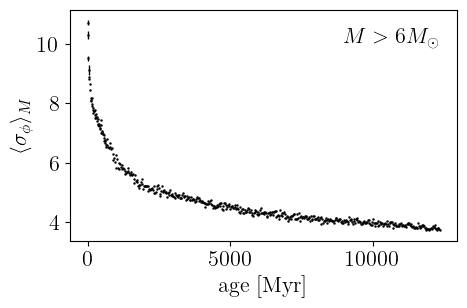

In [4]:
plt.figure(figsize=(5,3))
plt.errorbar(time[::10],mean[::10],yerr=err[::10],linestyle='',marker='.',markersize=1.5,alpha=1,color='black',elinewidth=1)
plt.ylabel(r"$\langle \sigma_\phi\rangle_M$")
plt.xlabel("age [Myr]")
plt.text(x=9000,y=10,s=r"$M > 6M_\odot$")
#plt.savefig("figures/bh_vs_age.png",bbox_inches='tight')
plt.show()

In [ ]:
save_path_training_curves = 'demo_curves.png'
save_path_log             = 'demo.log'

run_logger     = lambda : monitoring.RunLogger(save_path = save_path_log,
                                                do_save = True)

run_visualiser = lambda : monitoring.RunVisualiser (epoch_refresh_rate = 1,
                                           save_path = save_path_training_curves,
                                           do_show   = True,
                                           do_prints = True,
                                           do_save   = True, )

# Running SR task
time_train = time[::5]
mean_train = mean[::5]
expression, logs = physo.SR(np.array(time_train).reshape((1,len(time_train)))/1e3, mean_train,
                            # Giving names of variables (for display purposes)
                            X_names = [ "t"],
                            # Associated physical units (ignore or pass zeroes if irrelevant)
                            X_units = [ [0, 1, 0 ]],
                            # Giving name of root variable (for display purposes)
                            y_name  = "s",
                            y_units = [1, -1, 0],
                            # Fixed constants
                            fixed_consts       = [ 1.      ],
                            fixed_consts_units = [ [0,0,0] ],
                            # Free constants names (for display purposes)
                            free_consts_names = [ "t0"   , "s0"  ],
                            free_consts_units = [ [0, 1, 0] , [1,-1,0] ],
                            # Symbolic operations that can be used to make f
                            op_names = ["mul", "add", "sub", "div", "inv", "n2", "sqrt", "neg", "exp", "log"],
                            get_run_logger     = run_logger,
                            get_run_visualiser = run_visualiser,
                            # Run config
                            run_config = physo.config.config1.config1,
                            # Parallel mode (only available when running from python scripts, not notebooks)
                            parallel_mode = False,
                            # Number of iterations
                            epochs = 20
)

=========== Epoch 00016 ===========
-> Time 123.62 s
-> Memory Usage: 5544.89 MB

Overall best  at R=0.883081
-> Raw expression : 
                       0.5
     0.5  ⎛     1     ⎞   
    t   ⋅-⎜───────────⎟   
          ⎝t + t₀ + t₀⎠   
s₀⋅ℯ                      

Best of epoch at R=0.872458
Unable to print status, error:



/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


In [ ]:
import sympy
best_expr = expression
print(best_expr.get_infix_pretty())

In [10]:
import sympy

# Loading pareto front expressions
pareto_expressions = physo.read_pareto_pkl("demo_curves_pareto.pkl")
# Most accurate expression is the last in the Pareto front:
best_expr = pareto_expressions[-1]
print(best_expr.get_infix_pretty())

                  1.0                  
───────────────────────────────────────
                                      2
⎛                                 0.5⎞ 
⎜ ⎛     ⎛              0.5⎞      ⎞   ⎟ 
⎜ ⎜     ⎜⎛      t + t₀⎞   ⎟      ⎟   ⎟ 
⎜ ⎜- log⎜⎜1.0 + ──────⎟   ⎟ - 1.0⎟   ⎟ 
⎜ ⎜     ⎝⎝        t₀  ⎠   ⎠      ⎟   ⎟ 
⎜-⎜──────────────────────────────⎟   ⎟ 
⎝ ⎝              s₀              ⎠   ⎠ 


In [12]:
best_expr.get_infix_sympy()

1.0/((-((-log((1.0 + (t + t0)/t0)**0.5) - 1*1.0)/s0)**0.5)**2)

In [13]:
best_expr.get_infix_sympy(evaluate_consts=True)[0]

1.0/(-0.0762884758431827*log((8.76497554456259*t + 2.0)**0.5) - 0.0762884758431827)**1.0

3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


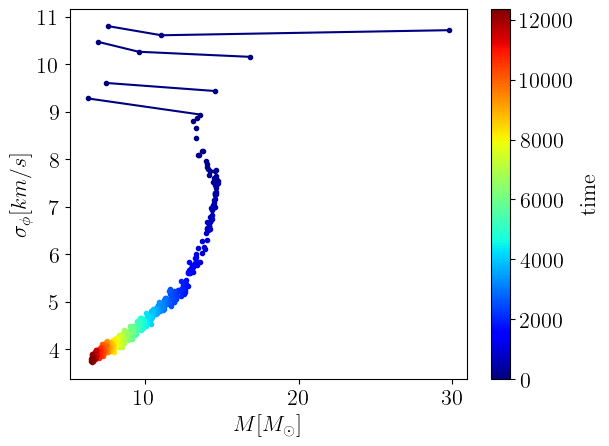

In [10]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm


# Example structure for bh, replace with your real data
# bh = {'time': [...], 'm': [...], 's_bh_m': [...]}

t_values = np.array(bh['time'])
norm = mcolors.Normalize(vmin=np.min(t_values), vmax=np.max(t_values))
cmap = cm.jet

fig, ax = plt.subplots()
ax.set_xlabel(r"$M [M_\odot]$")
ax.set_ylabel(r"$\sigma_\phi [km/s]$")

for i, t in enumerate(t_values):
    if i % 10 == 0:  # optional limit
        
        color = cmap(norm(t))
        ax.plot(bh['m'][i], bh['s_bh_m'][i], marker='.', color=color)
        if i % 100 == 0:
            print(len(bh['m'][i]))
    

# Add colorbar linked to this figure and axes
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('time')

plt.show()

In [11]:
def v_phi_dataset(v_phi,m,age):
    ds = {"time": [], "v_phi_m": [], "m": []}
    for i in range(v_phi.shape[0]):
        mask = np.isnan(v_phi[i])
        if len(v_phi[i][~mask]) >0:
            assert len(v_phi[i][~mask]) == len(m[i][~mask])
            tmp_v_phi = v_phi[i][~mask]
            tmp_m = m[i][~mask]
            ds["v_phi_m"].append(tmp_v_phi)
            ds["time"].append(age[i])
            ds["m"].append(tmp_m.reshape(1,len(tmp_m)))

    return ds

v_phi_ds = v_phi_dataset(v_phi_m,m,age)

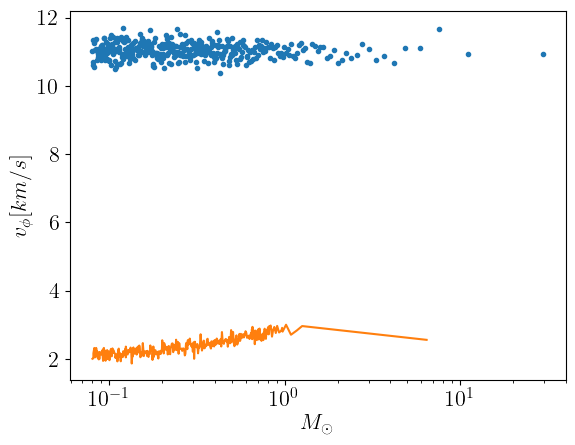

In [12]:
v_phi_0 = v_phi_m[0]
mass_0 = m[0].reshape(1,len(m[0]))



plt.figure()
plt.plot(mass_0.flatten(),v_phi_0,'.')
plt.plot(v_phi_ds["m"][-1].flatten(),v_phi_ds["v_phi_m"][-1])
plt.xlabel(r"$M_\odot$")
plt.ylabel(r"$v_\phi [km/s]$")
plt.xscale('log')
plt.show()

Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
SR task started...


/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/batch_execute.py:80: UserWarning: Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
  warnings.warn(msg)
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


=========== Epoch 00000 ===========
-> Time 10.08 s
-> Memory Usage: 5330.45 MB

Overall best  at R=0.667134
-> Raw expression : 
          ⎛  -m     ⎞ 
      -log⎜- ─── - 1⎟ 
          ⎝  m₀     ⎠ 
-v₀ + ────────────────
                 2    
          ⎛ -1  ⎞     
          ⎜─────⎟     
          ⎜  0.5⎟     
          ⎝v₀   ⎠     

Best of epoch at R=0.667134
-> Raw expression : 
          ⎛  -m     ⎞ 
      -log⎜- ─── - 1⎟ 
          ⎝  m₀     ⎠ 
-v₀ + ────────────────
                 2    
          ⎛ -1  ⎞     
          ⎜─────⎟     
          ⎜  0.5⎟     
          ⎝v₀   ⎠     




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


=========== Epoch 00001 ===========
-> Time 60.94 s
-> Memory Usage: 5461.34 MB

Overall best  at R=0.686515
-> Raw expression : 
   ⎛                                   2    ⎞
   ⎜⎛              2                  ⎞     ⎟
   ⎜⎜    ⎛     0.5⎞                   ⎟     ⎟
   ⎜⎜    ⎜ ⎛1 ⎞   ⎟       ⎛ 0.5   -1 ⎞⎟     ⎟
v₀⋅⎜⎜- m⋅⎜-⎜──⎟   ⎟  + log⎜1    - ───⎟⎟  - 1⎟
   ⎝⎝    ⎝ ⎝m₀⎠   ⎠       ⎝        1 ⎠⎠     ⎠
─────────────────────────────────────────────
                      1                      

Best of epoch at R=0.686515
-> Raw expression : 
   ⎛                                   2    ⎞
   ⎜⎛              2                  ⎞     ⎟
   ⎜⎜    ⎛     0.5⎞                   ⎟     ⎟
   ⎜⎜    ⎜ ⎛1 ⎞   ⎟       ⎛ 0.5   -1 ⎞⎟     ⎟
v₀⋅⎜⎜- m⋅⎜-⎜──⎟   ⎟  + log⎜1    - ───⎟⎟  - 1⎟
   ⎝⎝    ⎝ ⎝m₀⎠   ⎠       ⎝        1 ⎠⎠     ⎠
─────────────────────────────────────────────
                      1                      




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


=========== Epoch 00002 ===========
-> Time 64.18 s
-> Memory Usage: 5787.61 MB

Overall best  at R=0.686515
-> Raw expression : 
   ⎛                                   2    ⎞
   ⎜⎛              2                  ⎞     ⎟
   ⎜⎜    ⎛     0.5⎞                   ⎟     ⎟
   ⎜⎜    ⎜ ⎛1 ⎞   ⎟       ⎛ 0.5   -1 ⎞⎟     ⎟
v₀⋅⎜⎜- m⋅⎜-⎜──⎟   ⎟  + log⎜1    - ───⎟⎟  - 1⎟
   ⎝⎝    ⎝ ⎝m₀⎠   ⎠       ⎝        1 ⎠⎠     ⎠
─────────────────────────────────────────────
                      1                      

Best of epoch at R=0.683687
-> Raw expression : 
            2       
     ⎛ -m₀ ⎞        
     ⎜ ────⎟        
     ⎜  m  ⎟        
- v₀⋅⎝ℯ    ⎠  - 2⋅v₀




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


=========== Epoch 00003 ===========
-> Time 62.35 s
-> Memory Usage: 5872.95 MB

Overall best  at R=0.687908
-> Raw expression : 
   ⎛⎛       1          ⎞    ⎞
   ⎜⎜ ─────────────    ⎟    ⎟
   ⎜⎜     2            ⎟    ⎟
   ⎜⎜ ⎛m₀⎞             ⎟    ⎟
   ⎜⎜ ⎜──⎟  + 1 + 1    ⎟    ⎟
   ⎜⎜ ⎝m ⎠             ⎟    ⎟
log⎝⎝ℯ              + 1⎠⋅1⋅1⎠
─────────────────────────────
            ⎛1 ⎞             
            ⎜──⎟             
            ⎝v₀⎠             

Best of epoch at R=0.687908
-> Raw expression : 
   ⎛⎛       1          ⎞    ⎞
   ⎜⎜ ─────────────    ⎟    ⎟
   ⎜⎜     2            ⎟    ⎟
   ⎜⎜ ⎛m₀⎞             ⎟    ⎟
   ⎜⎜ ⎜──⎟  + 1 + 1    ⎟    ⎟
   ⎜⎜ ⎝m ⎠             ⎟    ⎟
log⎝⎝ℯ              + 1⎠⋅1⋅1⎠
─────────────────────────────
            ⎛1 ⎞             
            ⎜──⎟             
            ⎝v₀⎠             




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


=========== Epoch 00004 ===========
-> Time 65.12 s
-> Memory Usage: 5778.64 MB

Overall best  at R=0.691734
-> Raw expression : 
   ⎛       1   ⎞          
v₀⋅⎜1 + ───────⎟          
   ⎜    m    m₀⎟          
   ⎜    ── + ──⎟          
   ⎝    m₀   m ⎠          
──────────────── - v₀ + v₀
       1                  

Best of epoch at R=0.691734
-> Raw expression : 
   ⎛       1   ⎞          
v₀⋅⎜1 + ───────⎟          
   ⎜    m    m₀⎟          
   ⎜    ── + ──⎟          
   ⎝    m₀   m ⎠          
──────────────── - v₀ + v₀
       1                  




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


=========== Epoch 00005 ===========
-> Time 64.64 s
-> Memory Usage: 5889.21 MB

Overall best  at R=0.691734
-> Raw expression : 
   ⎛       1   ⎞          
v₀⋅⎜1 + ───────⎟          
   ⎜    m    m₀⎟          
   ⎜    ── + ──⎟          
   ⎝    m₀   m ⎠          
──────────────── - v₀ + v₀
       1                  

Best of epoch at R=0.684014
-> Raw expression : 
            m             
      - ───────── - 1     
        ⎛  m₀   ⎞         
        ⎜───────⎟         
        ⎝1 + 1⋅1⎠         
- v₀⋅ℯ                + v₀




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


=========== Epoch 00006 ===========
-> Time 64.04 s
-> Memory Usage: 5759.50 MB

Overall best  at R=0.691734
-> Raw expression : 
   ⎛       1   ⎞          
v₀⋅⎜1 + ───────⎟          
   ⎜    m    m₀⎟          
   ⎜    ── + ──⎟          
   ⎝    m₀   m ⎠          
──────────────── - v₀ + v₀
       1                  

Best of epoch at R=0.674656
-> Raw expression : 
            1            
─────────────────────────
⎛    ⎛ 0.5         ⎞    ⎞
⎜   2⎜m            ⎟    ⎟
⎜log ⎜───── - 1 - 1⎟ + 1⎟
⎜    ⎜  0.5        ⎟    ⎟
⎜    ⎝m₀           ⎠    ⎟
⎜───────────────────────⎟
⎝          v₀           ⎠




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


=========== Epoch 00007 ===========
-> Time 70.46 s
-> Memory Usage: 5837.27 MB

Overall best  at R=0.691734
-> Raw expression : 
   ⎛       1   ⎞          
v₀⋅⎜1 + ───────⎟          
   ⎜    m    m₀⎟          
   ⎜    ── + ──⎟          
   ⎝    m₀   m ⎠          
──────────────── - v₀ + v₀
       1                  

Best of epoch at R=0.687920
-> Raw expression : 
        1        
─────────────────
     1         1 
──────────── - ──
⎛     -1   ⎞   v₀
⎜ m⋅───────⎟     
⎜   -1⋅m₀⋅1⎟     
⎜ℯ         ⎟     
⎜──────────⎟     
⎜ ⎛  m   ⎞ ⎟     
⎜ ⎜──────⎟ ⎟     
⎜ ⎜⎛ m₀ ⎞⎟ ⎟     
⎜ ⎜⎜────⎟⎟ ⎟     
⎜ ⎜⎜⎛1 ⎞⎟⎟ ⎟     
⎜ ⎜⎜⎜──⎟⎟⎟ ⎟     
⎝ ⎝⎝⎝v₀⎠⎠⎠ ⎠     




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


=========== Epoch 00008 ===========
-> Time 75.32 s
-> Memory Usage: 5792.78 MB

Overall best  at R=0.691734
-> Raw expression : 
   ⎛       1   ⎞          
v₀⋅⎜1 + ───────⎟          
   ⎜    m    m₀⎟          
   ⎜    ── + ──⎟          
   ⎝    m₀   m ⎠          
──────────────── - v₀ + v₀
       1                  

Best of epoch at R=0.684229
-> Raw expression : 
   ⎛       1   ⎞          
   ⎜     ──────⎟          
   ⎜        -m ⎟          
   ⎜     m₀⋅───⎟          
   ⎜        m⋅m⎟          
v₀⋅⎝1 - ℯ      ⎠ + v₀ + v₀




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric functions detected, (NestedTrigonometryPrior (tokens = [], nesting forbidden)), this prior will be ignored.
  warnings.warn("No trigonometric functions detected, (%s), this prior will be ignored." % (self))


=========== Epoch 00009 ===========
-> Time 73.91 s
-> Memory Usage: 5793.21 MB

Overall best  at R=0.691734
-> Raw expression : 
   ⎛       1   ⎞          
v₀⋅⎜1 + ───────⎟          
   ⎜    m    m₀⎟          
   ⎜    ── + ──⎟          
   ⎝    m₀   m ⎠          
──────────────── - v₀ + v₀
       1                  

Best of epoch at R=0.685578
-> Raw expression : 
           v₀       
v₀ - ───────────────
        m           
     ─────── + 1 + 1
     ⎛  1  ⎞        
     ⎜─────⎟        
     ⎜⎛ m ⎞⎟        
     ⎜⎜ ──⎟⎟        
     ⎜⎜ m₀⎟⎟        
     ⎜⎜ℯ  ⎟⎟        
     ⎜⎜───⎟⎟        
     ⎝⎝ m ⎠⎠        




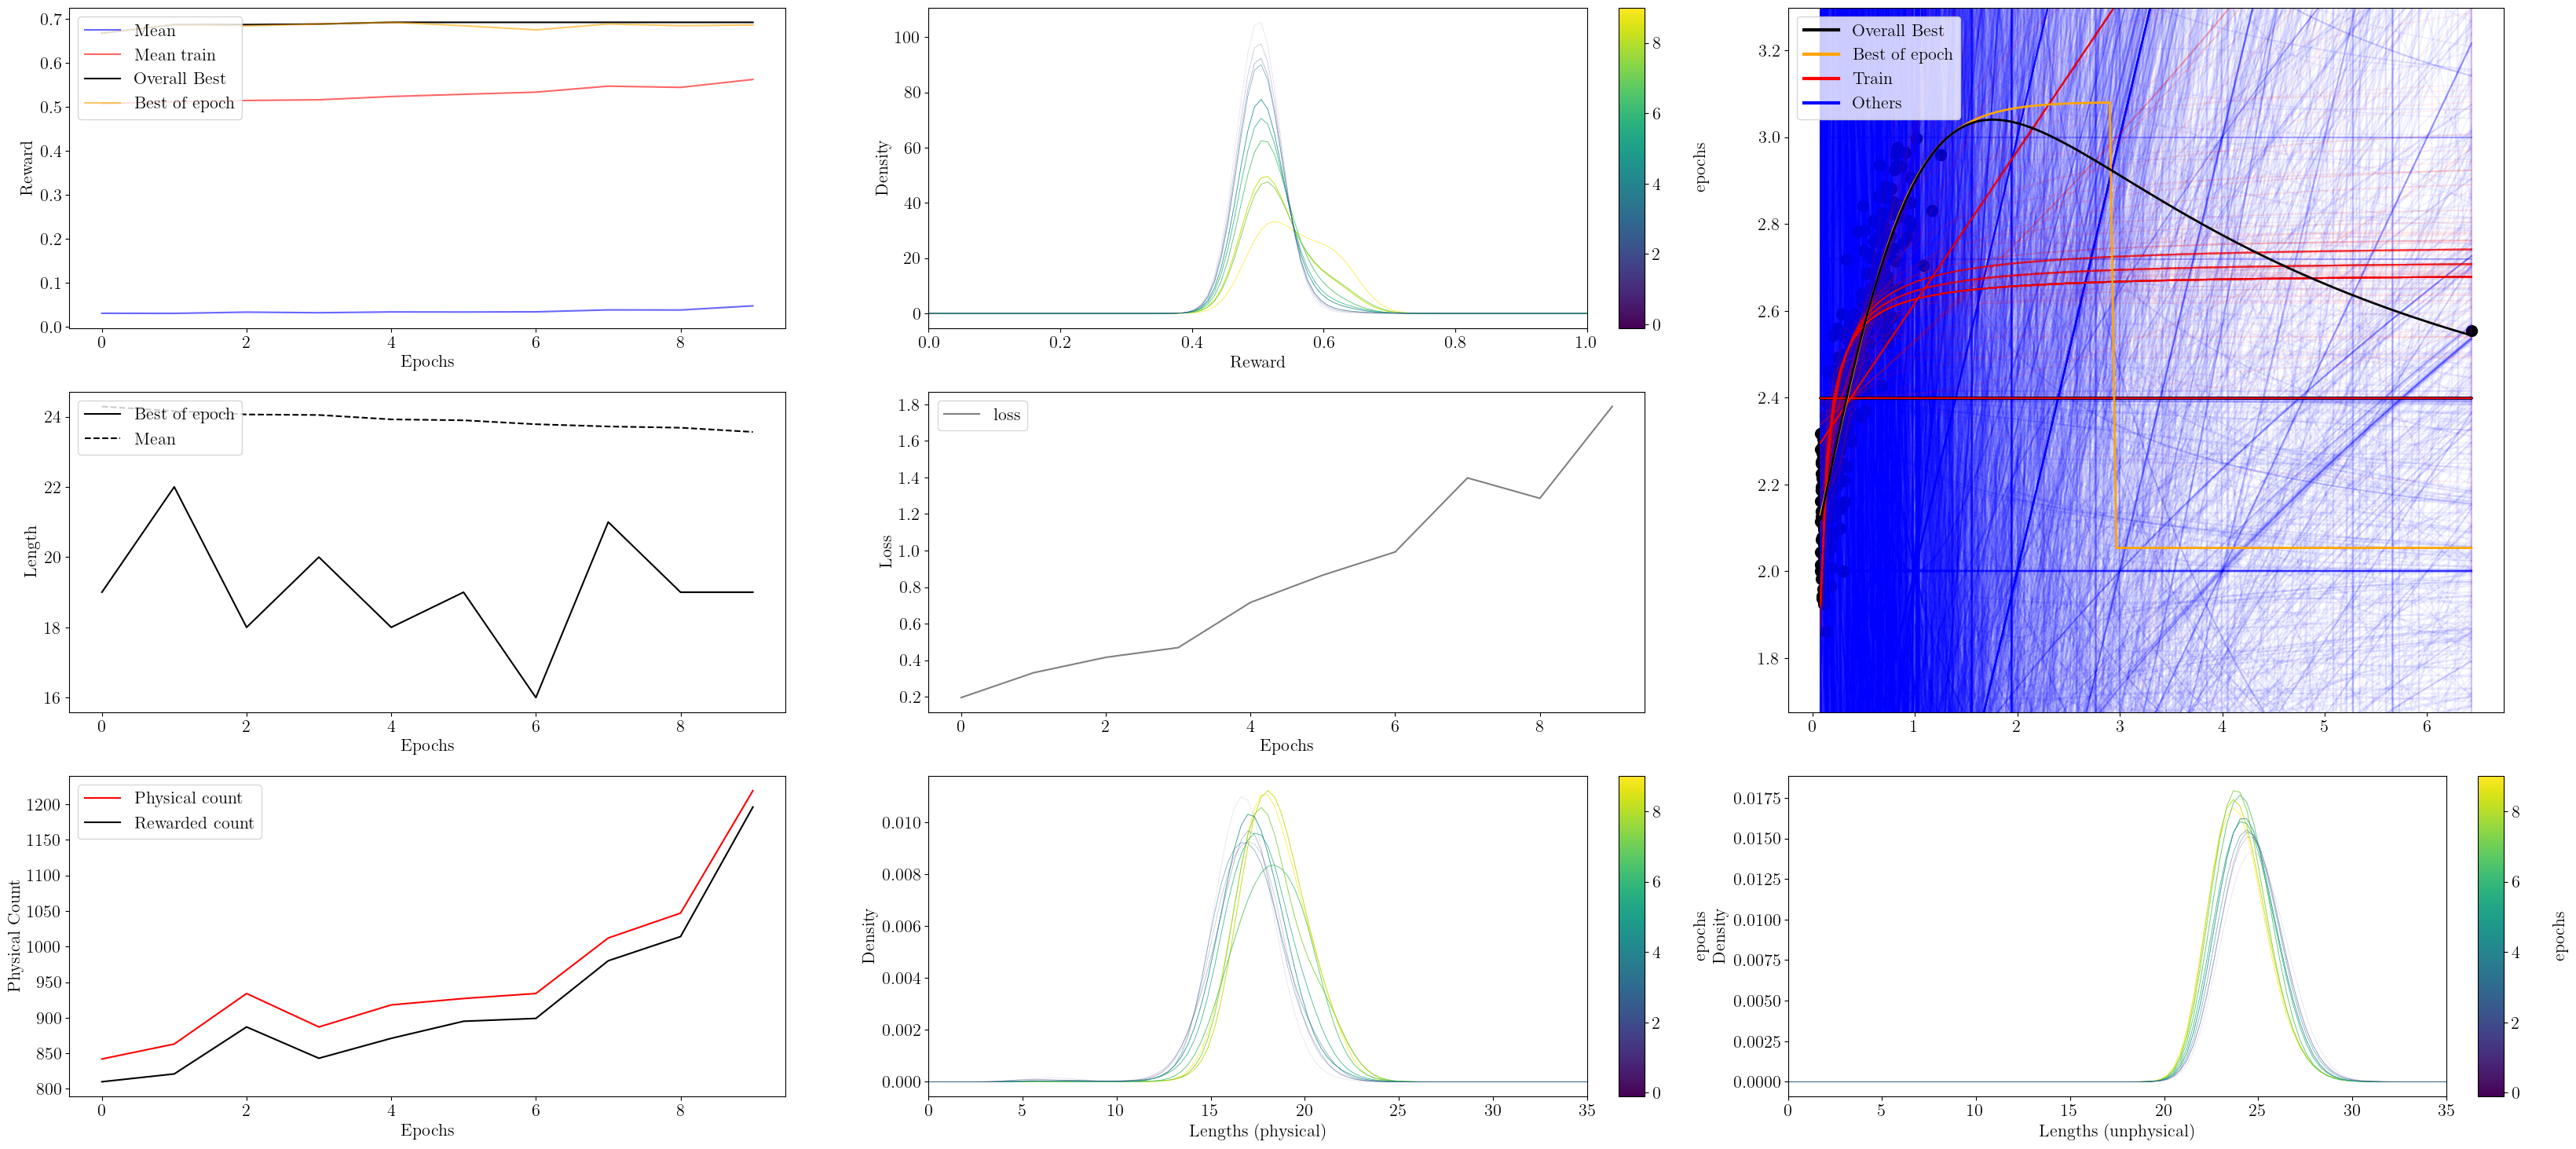

In [13]:
save_path_training_curves = 'demo_curves.png'
save_path_log             = 'demo.log'

run_logger     = lambda : monitoring.RunLogger(save_path = save_path_log,
                                                do_save = True)

run_visualiser = lambda : monitoring.RunVisualiser (epoch_refresh_rate = 1,
                                           save_path = save_path_training_curves,
                                           do_show   = False,
                                           do_prints = True,
                                           do_save   = True, )

# Running SR task
expression, logs = physo.SR(v_phi_ds["m"][-1],v_phi_ds["v_phi_m"][-1],
                            # Giving names of variables (for display purposes)
                            X_names = [ "m"],
                            # Associated physical units (ignore or pass zeroes if irrelevant)
                            X_units = [ [0, 0, 1 ]],
                            # Giving name of root variable (for display purposes)
                            y_name  = "v_phi",
                            y_units = [1, -1, 0],
                            # Fixed constants
                            fixed_consts       = [ 1],
                            fixed_consts_units = [ [0,0,0] ],
                            # Free constants names (for display purposes)
                            free_consts_names = [ "m0"   , "v0"  ],
                            free_consts_units = [ [0, 0, 1] , [1,-1,0] ],
                            # Symbolic operations that can be used to make f
                            op_names = ["mul", "add", "sub", "div", "inv", "n2", "sqrt", "neg", "exp", "log"],
                            get_run_logger     = run_logger,
                            get_run_visualiser = run_visualiser,
                            # Run config
                            run_config = physo.config.config1.config1,
                            # Parallel mode (only available when running from python scripts, not notebooks)
                            parallel_mode = False,
                            # Number of iterations
                            epochs = 10
)

In [14]:
def select_multiple_datasets(ds,n=10):
    times = []
    masses = []
    v_phis_m = []
    # Selecting the points
    indices = np.random.choice(size=n,a=range(len(ds["time"])),replace = False)
    for idx in indices:
        
        times.append(ds["time"][idx])
        masses.append(ds["m"][idx])
        v_phis_m.append(ds["v_phi_m"][idx])


    return times,masses,v_phis_m

In [15]:
times,masses,v_phis = select_multiple_datasets(v_phi_ds)

Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
SR task started...


/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/batch_execute.py:80: UserWarning: Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
  warnings.warn(msg)
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['exp'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given 

Unable to save pareto data, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto front expressions as pkl, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto figure, error:
index 0 is out of bounds for axis 0 with size 0
=========== Epoch 00000 ===========
-> Time 2.78 s
-> Memory Usage: 5735.52 MB

Overall best  at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────────
              ⎛            k₁      ⎞
k₀ + k₁ + 1.0⋅⎜-c₀ + ──────────────⎟
              ⎜         c₀         ⎟
              ⎜      ───────── + k₁⎟
              ⎜            c₀      ⎟
              ⎜      -c₀ + ───     ⎟
              ⎝            1.0     ⎠

Best of epoch at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────

/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['exp'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['log'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric funct

Unable to save pareto data, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto front expressions as pkl, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto figure, error:
index 0 is out of bounds for axis 0 with size 0
=========== Epoch 00001 ===========
-> Time 2.54 s
-> Memory Usage: 5642.09 MB

Overall best  at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────────
              ⎛            k₁      ⎞
k₀ + k₁ + 1.0⋅⎜-c₀ + ──────────────⎟
              ⎜         c₀         ⎟
              ⎜      ───────── + k₁⎟
              ⎜            c₀      ⎟
              ⎜      -c₀ + ───     ⎟
              ⎝            1.0     ⎠

Best of epoch at R=0.000000
-> Raw expression : 
                c₀ - k₀                 
────────────────────────────────────────
k₀⋅k₁⋅m⋅(-c₀⋅m + m)⋅(c₀⋅(1.0 - c₀) + k₁)




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['exp'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['log'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric funct

Unable to save pareto data, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto front expressions as pkl, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto figure, error:
index 0 is out of bounds for axis 0 with size 0
=========== Epoch 00002 ===========
-> Time 2.23 s
-> Memory Usage: 5642.09 MB

Overall best  at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────────
              ⎛            k₁      ⎞
k₀ + k₁ + 1.0⋅⎜-c₀ + ──────────────⎟
              ⎜         c₀         ⎟
              ⎜      ───────── + k₁⎟
              ⎜            c₀      ⎟
              ⎜      -c₀ + ───     ⎟
              ⎝            1.0     ⎠

Best of epoch at R=0.000000
-> Raw expression : 
                 c₀                          
───────────────────────────────────── - m + m
       ⎛     m ⎞ ⎛    k₁            ⎞        
1.0⋅k

/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['exp'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['log'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric funct

Unable to save pareto data, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto front expressions as pkl, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto figure, error:
index 0 is out of bounds for axis 0 with size 0
=========== Epoch 00003 ===========
-> Time 1.91 s
-> Memory Usage: 5642.09 MB

Overall best  at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────────
              ⎛            k₁      ⎞
k₀ + k₁ + 1.0⋅⎜-c₀ + ──────────────⎟
              ⎜         c₀         ⎟
              ⎜      ───────── + k₁⎟
              ⎜            c₀      ⎟
              ⎜      -c₀ + ───     ⎟
              ⎝            1.0     ⎠

Best of epoch at R=0.000000
-> Raw expression : 
(k₁⋅(k₀ + m⋅m) - k₁)⋅((k₀ + k₁ + 1.0)⋅c₀⋅1.0 - (1.0 - 1.0))




/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['exp'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['log'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric funct

Unable to save pareto data, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto front expressions as pkl, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto figure, error:
index 0 is out of bounds for axis 0 with size 0
=========== Epoch 00004 ===========
-> Time 2.60 s
-> Memory Usage: 5642.09 MB

Overall best  at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────────
              ⎛            k₁      ⎞
k₀ + k₁ + 1.0⋅⎜-c₀ + ──────────────⎟
              ⎜         c₀         ⎟
              ⎜      ───────── + k₁⎟
              ⎜            c₀      ⎟
              ⎜      -c₀ + ───     ⎟
              ⎝            1.0     ⎠

Best of epoch at R=0.000000
-> Raw expression : 
   ⎛ c₀       ⎞ ⎛       k₀       ⎞                        
c₀⋅⎜───── + k₀⎟⋅⎜c₀ + ─────── + m⎟ - c₀ - c₀ - k₁ + k₁ + m
   ⎝k₀⋅k₁     ⎠ ⎝     c₀ 

/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['exp'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['log'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric funct

Unable to save pareto data, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto front expressions as pkl, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto figure, error:
index 0 is out of bounds for axis 0 with size 0
=========== Epoch 00005 ===========
-> Time 1.86 s
-> Memory Usage: 5642.09 MB

Overall best  at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────────
              ⎛            k₁      ⎞
k₀ + k₁ + 1.0⋅⎜-c₀ + ──────────────⎟
              ⎜         c₀         ⎟
              ⎜      ───────── + k₁⎟
              ⎜            c₀      ⎟
              ⎜      -c₀ + ───     ⎟
              ⎝            1.0     ⎠

Best of epoch at R=0.000000
-> Raw expression : 
                                        1 
c₀ - k₀ + k₁ - (c₀ + c₀ + c₀ + 1.0)⋅1.0⋅──
                                        c₀
──────────────

/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['exp'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['log'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric funct

Unable to save pareto data, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto front expressions as pkl, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto figure, error:
index 0 is out of bounds for axis 0 with size 0
=========== Epoch 00006 ===========
-> Time 1.89 s
-> Memory Usage: 5642.09 MB

Overall best  at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────────
              ⎛            k₁      ⎞
k₀ + k₁ + 1.0⋅⎜-c₀ + ──────────────⎟
              ⎜         c₀         ⎟
              ⎜      ───────── + k₁⎟
              ⎜            c₀      ⎟
              ⎜      -c₀ + ───     ⎟
              ⎝            1.0     ⎠

Best of epoch at R=0.000000
-> Raw expression : 
                        1.0                         
────────────────────────────────────────────────────
  ⎛     m ⎞                          

/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['exp'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['log'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric funct

Unable to save pareto data, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto front expressions as pkl, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto figure, error:
index 0 is out of bounds for axis 0 with size 0
=========== Epoch 00007 ===========
-> Time 2.56 s
-> Memory Usage: 5642.09 MB

Overall best  at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────────
              ⎛            k₁      ⎞
k₀ + k₁ + 1.0⋅⎜-c₀ + ──────────────⎟
              ⎜         c₀         ⎟
              ⎜      ───────── + k₁⎟
              ⎜            c₀      ⎟
              ⎜      -c₀ + ───     ⎟
              ⎝            1.0     ⎠

Best of epoch at R=0.000000
-> Raw expression : 
⎛              1.0      ⎞                  
⎜m + m + ───────────────⎟⋅k₀⋅1.0⋅(c₀ + 1.0)
⎜        ⎛k₀ + k₁ + 1.0⎞⎟                  
⎜        ⎜─

/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['exp'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['log'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric funct

Unable to save pareto data, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto front expressions as pkl, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto figure, error:
index 0 is out of bounds for axis 0 with size 0
=========== Epoch 00008 ===========
-> Time 1.91 s
-> Memory Usage: 5642.09 MB

Overall best  at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────────
              ⎛            k₁      ⎞
k₀ + k₁ + 1.0⋅⎜-c₀ + ──────────────⎟
              ⎜         c₀         ⎟
              ⎜      ───────── + k₁⎟
              ⎜            c₀      ⎟
              ⎜      -c₀ + ───     ⎟
              ⎝            1.0     ⎠

Best of epoch at R=0.000000
-> Raw expression : 
              c₀               
───────────────────────────────
⎛            c₀⋅k₀            ⎞
⎜─────────────────────────────⎟
⎜⎛             

/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['exp'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:870: UserWarning: An error occurred while making prior NestedFunctions, this prior will be ignored. Error message:
Some tokens given in argument functions: ['log'] are not in the library of tokens: ['add' 'sub' 'mul' 'div' '1.0' 'c0' 'k0' 'k1' 'm' 'v_phi' 'dummy' '-']
  warnings.warn("An error occurred while making prior %s, this prior will be ignored. "
/pbs/home/a/astropart22/.local/lib/python3.11/site-packages/physo/physym/prior.py:557: UserWarning: No trigonometric funct

Unable to save pareto data, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto front expressions as pkl, error:
index 0 is out of bounds for axis 0 with size 0
Unable to save pareto figure, error:
index 0 is out of bounds for axis 0 with size 0
=========== Epoch 00009 ===========
-> Time 1.85 s
-> Memory Usage: 5642.09 MB

Overall best  at R=0.000000
-> Raw expression : 
            c₀                      
            ── + k₀ + k₀            
            k₀                      
────────────────────────────────────
              ⎛            k₁      ⎞
k₀ + k₁ + 1.0⋅⎜-c₀ + ──────────────⎟
              ⎜         c₀         ⎟
              ⎜      ───────── + k₁⎟
              ⎜            c₀      ⎟
              ⎜      -c₀ + ───     ⎟
              ⎝            1.0     ⎠

Best of epoch at R=0.000000
-> Raw expression : 
  ⎛         1    1                     ⎞
m⋅⎜c₀⋅1.0⋅m⋅──⋅──────⋅k₀⋅m⋅1.0⋅k₀ - 1.0⎟
  ⎝         k₁ -m + m                  ⎠




IndexError: index 0 is out of bounds for axis 0 with size 0

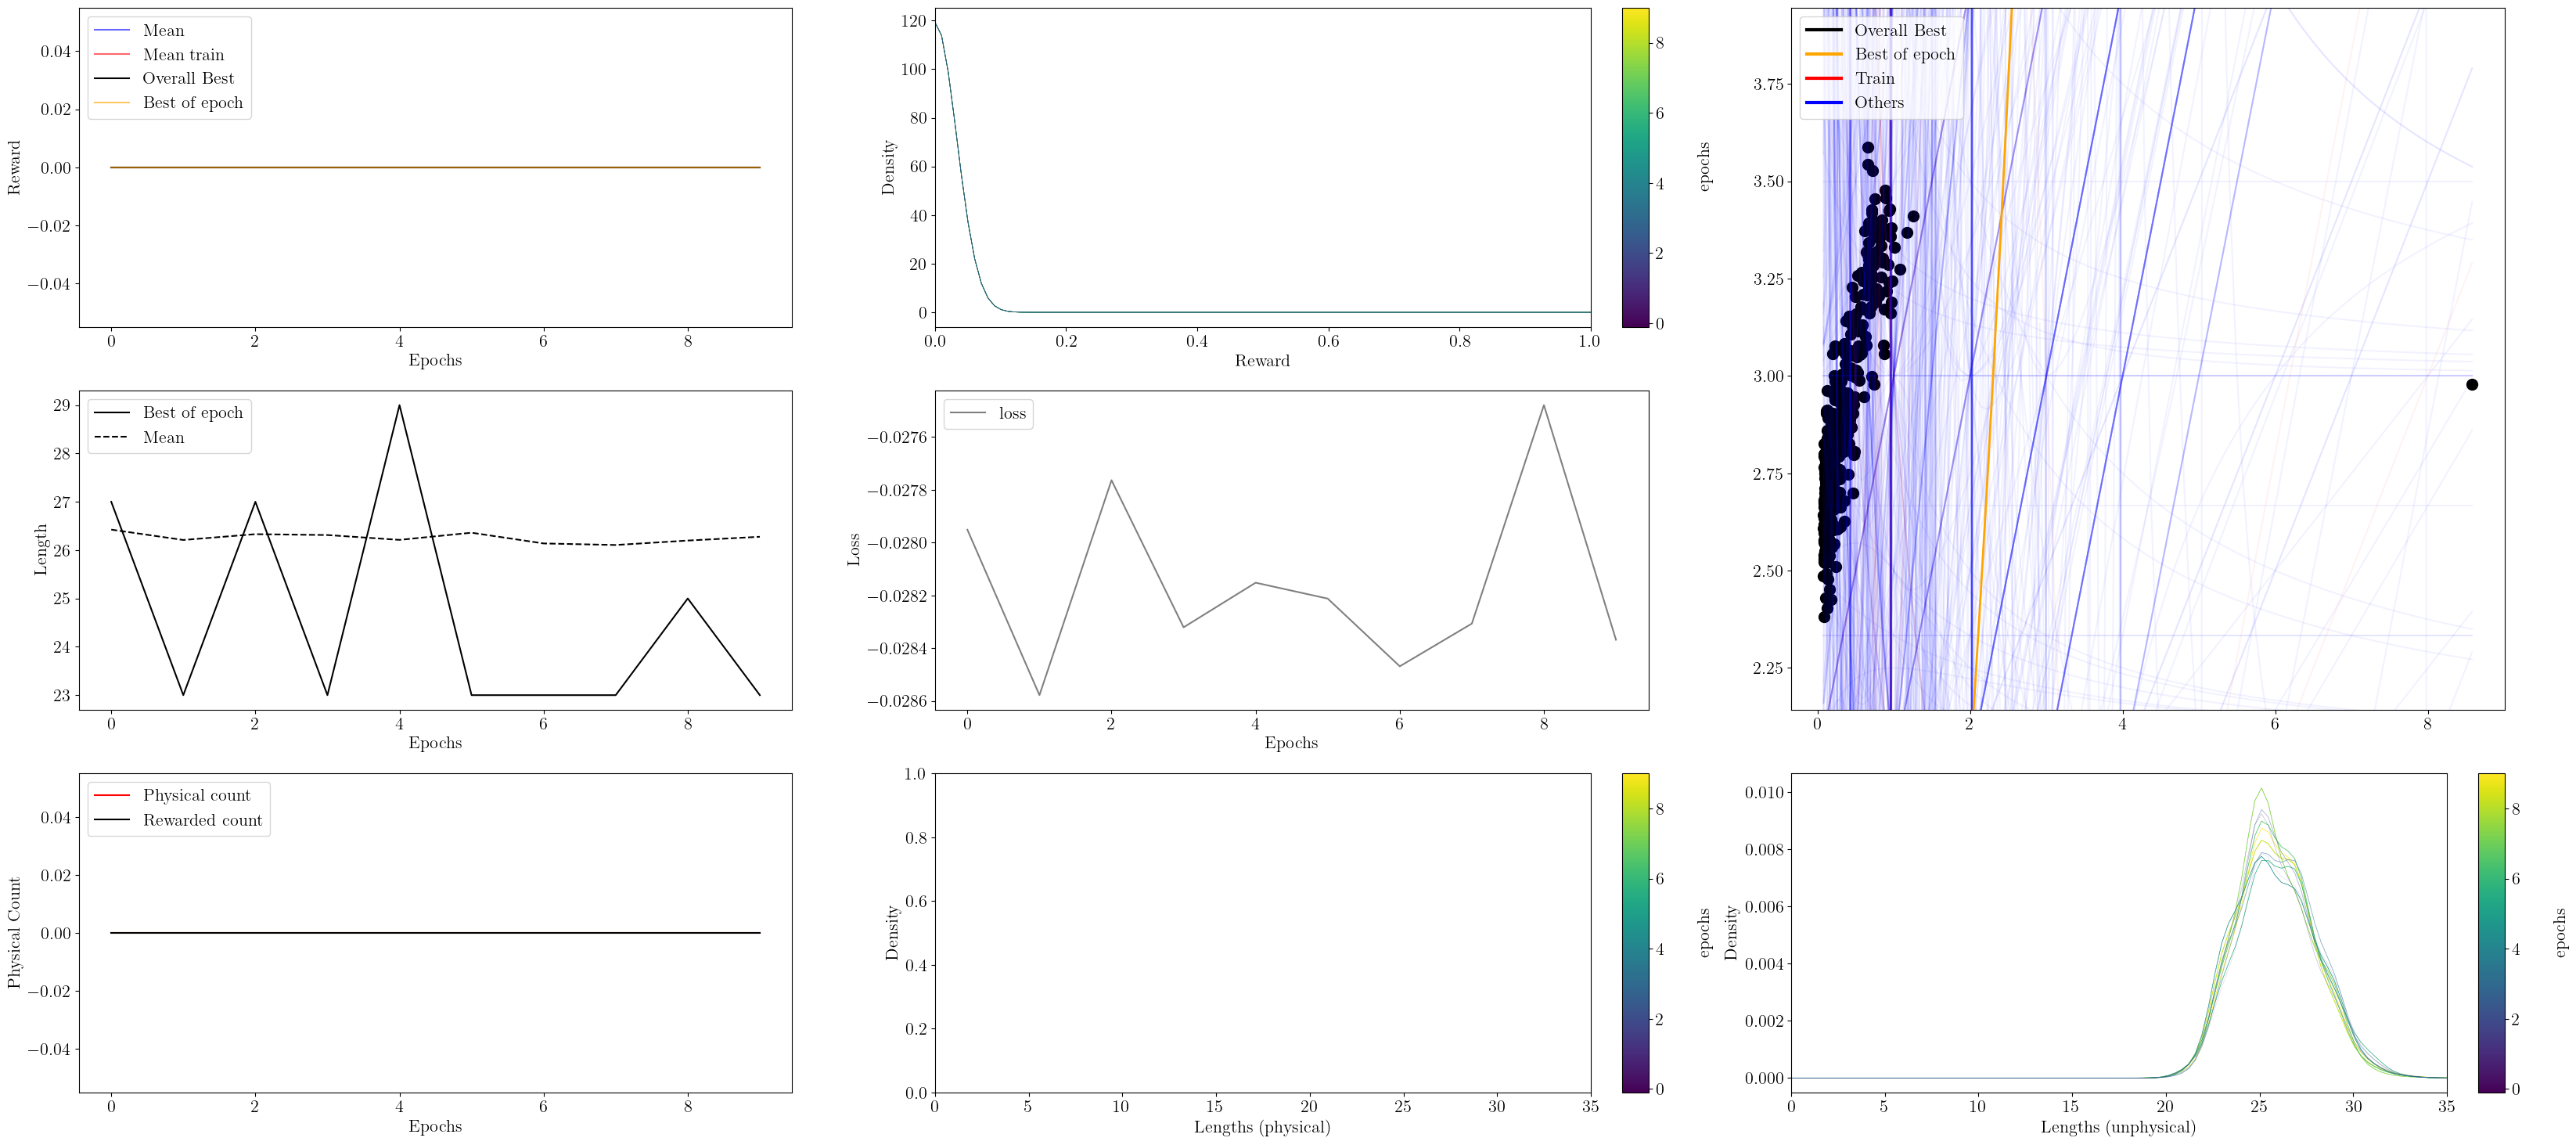

In [16]:
# Running SR task
expression, logs = physo.ClassSR(masses, v_phis,
                            # Giving names of variables (for display purposes)
                            X_names = [ "m"      ],
                            # Associated physical units (ignore or pass zeroes if irrelevant)
                            X_units = [ [0, 0, 1] ],
                            # Giving name of root variable (for display purposes)
                            y_name  = "v_phi",
                            y_units = [1, -1, 0],
                            # Fixed constants
                            fixed_consts       = [ 1.      ],
                            fixed_consts_units = [ [0, 0, 0] ],
                            # Whole class free constants
                            class_free_consts_names = [ "c0"      ,],
                            class_free_consts_units = [ [0, 0, 0] ,],
                            # Realization specific free constants
                            spe_free_consts_names = [ "k0"      , "k1"        ],
                            spe_free_consts_units = [ [0, 0, 0] , [0, 0, 0]   ],
                            # Run config
                            run_config = physo.config.config0.config0,
                            # Symbolic operations that can be used to make f
                            op_names = ["add", "sub", "mul", "div"],
                            get_run_logger     = run_logger,
                            get_run_visualiser = run_visualiser,
                            # Parallel mode (only available when running from python scripts, not notebooks)
                            parallel_mode = False,
                            # Number of iterations
                            epochs = 10,
)